# <font color='orange'>SALES PREDICTION</font>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
sales_data=pd.read_csv("C:\\Users\\HP\\Downloads\\advertising.csv")

In [5]:
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

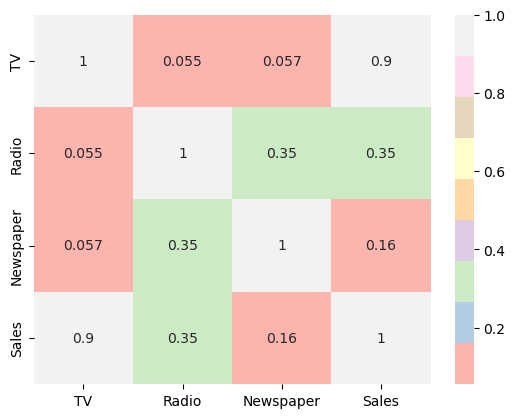

In [13]:
sns.heatmap(sales_data[['TV','Radio','Newspaper','Sales']].corr(),annot=True,cmap='Pastel1')

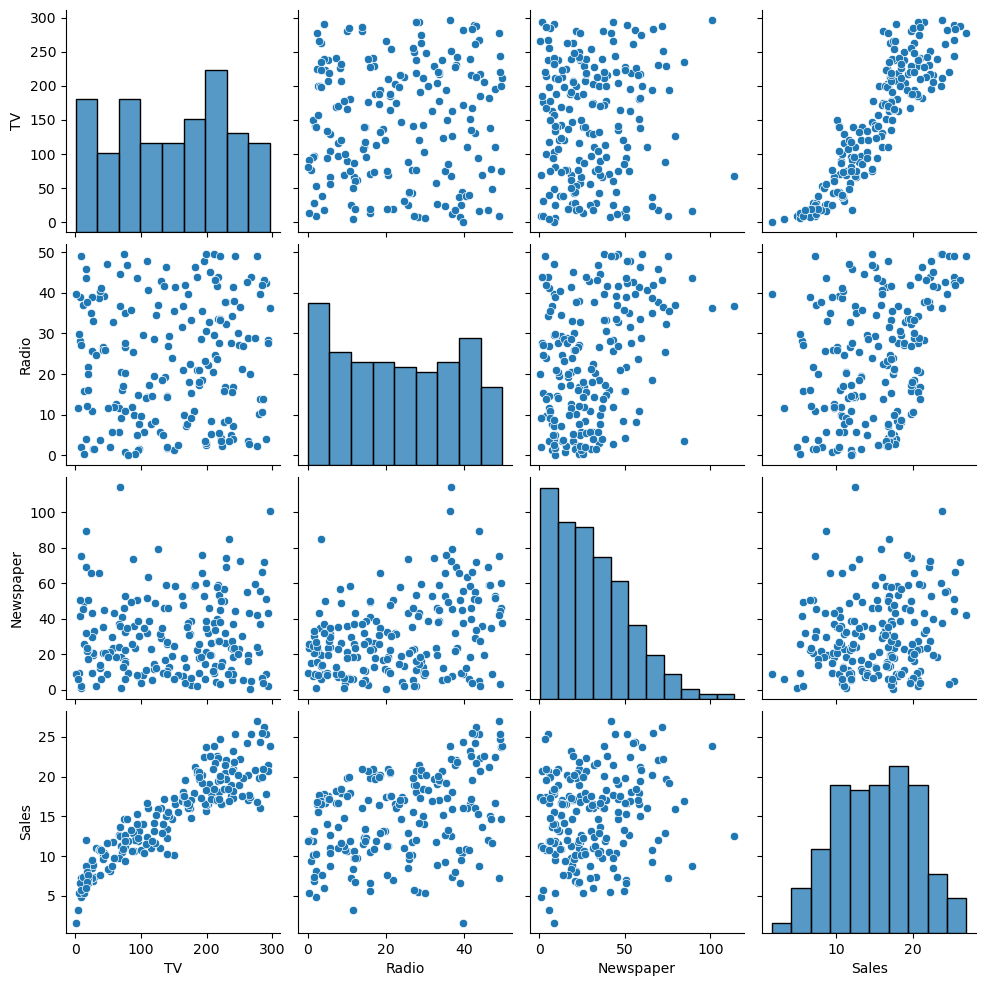

In [47]:
sns.pairplot(sales_data)

In [58]:
x=np.array(sales_data.iloc[ : ,:3])
y=np.array(sales_data.iloc[ : ,-1])
print(x.shape,y.shape)

(200, 3) (200,)


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [64]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [65]:
x_train_predc=model.predict(x_train_scaled)
x_test_predc=model.predict(x_test_scaled)

In [70]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
score_train=r2_score(y_train,x_train_predc)
msr_train=mean_squared_error(y_train,x_train_predc)
mar_train=mean_absolute_error(y_train,x_train_predc)                             
score_test=r2_score(y_test,x_test_predc)
msr_test=mean_squared_error(y_test,x_test_predc)
mar_test=mean_absolute_error(y_test,x_test_predc)  

In [73]:
print('THE TRAIN DATA')
print(f'THE R_SQUARE={score_train}')
print(f'THE MEAN SQUARED ERROR={msr_train}')
print(f'THE MEAN ABSOLUTE ERROR={mar_train}\n\n')
print('THE TEST DATA')
print(f'THE R_SQUARE={score_test}')
print(f'THE MEAN SQUARED ERROR={msr_test}')
print(f'THE MEAN ABSOLUTE ERROR={mar_test}\n\n\n')

THE TRAIN DATA
THE R_SQUARE=0.9001416005862131
THE MEAN SQUARED ERROR=2.6761426537826685
THE MEAN ABSOLUTE ERROR=1.2344160869575866


THE TEST DATA
THE R_SQUARE=0.9059011844150826
THE MEAN SQUARED ERROR=2.907756910271091
THE MEAN ABSOLUTE ERROR=1.2748262109549342



